# Исследование игр об  определяющих успешность закономерностей

В вашем распоряжении исторические данные из открытых источников — о продажах игр, оценках пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

pd.options.mode.chained_assignment = None

data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [2]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видно много пропусков у оценок игр, у некоторых данных неверный тип

### Подготовьте данные. 

#### Замените названия столбцов. 

In [4]:
#приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

#### Преобразуйте данные в нужные типы.

In [5]:
#проеобразуем столбцы в нужный тип данных и заполняем пропуски заглушкой
data['year_of_release'] = data['year_of_release'].fillna(-1).astype('int')
data['critic_score'] = data['critic_score'].fillna(-1).astype('int')

- в столбце `year_of_release` изменил тип данных на `int`, потому что год релиза может быть только целым числом
- в столбце `critic_score` изменил тип данных на `int`, потому что оценка критиков может быть только целым числом

#### Обработайте пропуски при необходимости.

##### Объясните, почему заполнили пропуски определённым образом или почему не стали это делать.

заполнил заглушкой пропуски в столбцах `year_of_release` и `critic_score`, для того чтобы в дальнейшем выделить их от основной массы

##### Опишите причины, которые могли привести к пропускам.

может быть недостаточно количества оценок для вынесение общей оценки, может не быть единой даты выхода игры, она могла выйти в разные годы для разных платформ, в разных страннах может быть разная система оценок игр

##### Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать.

In [6]:
#меняем значение tbd и заполняем пропуски на -1
data['user_score'] = data['user_score'].replace('tbd', -1).fillna(-1)
#меняем тип данных
data['user_score'] = data['user_score'].astype('float')

`tbd` расшифровывается как `to be determined` - будет определено, возможно эти игры еще не оценили пользователи, они могут находятся в альфа или бета тесте и поэтому пока что не могут быть оценены.
- Заполнил заглушкой значения `tbd` и пропуски. 
- Изменил тип данных на `float`, потому что оценки пользователей это числа с плавающей точкой

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [7]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [8]:
display(data.head(5))
#вычислим сколько % данных мы удалили
old_data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.shape[0] / old_data.shape[0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN,31.38


1.0

обработал пропуски в столбцах `year_of_release, critic_score`, изменил тип данных у столбцов `year_of_release, critic_score`, все первоначальные данные остались целыми

### Проведите исследовательский анализ данных. 

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

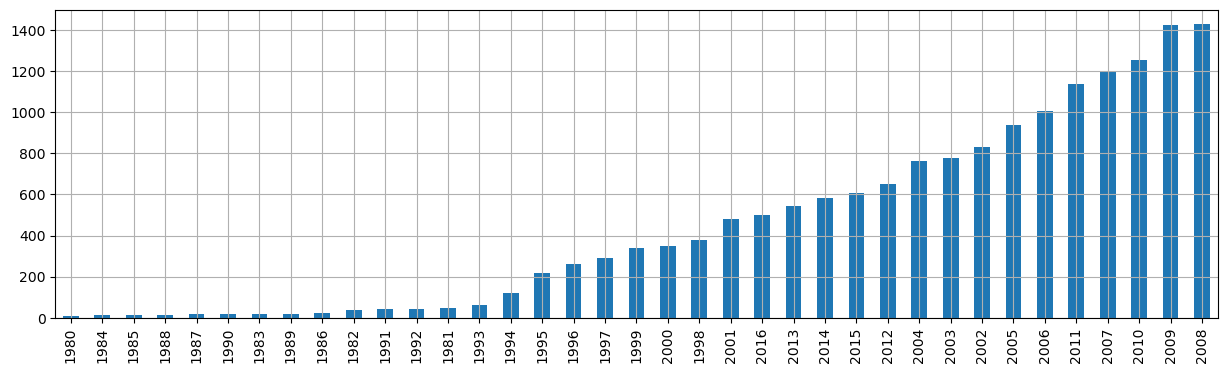

In [9]:
#строим столбчатую диаграмму
data[data['year_of_release'] > 0]['year_of_release'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize=(15, 4), grid=True)
plt.show()

Судя по графику можно предположить, что данные игр, которые выпускались до 1994 года не так важны. Потому что их количество очень мало по сравнению с играми выпущенными после 1994 года и в те года былы другие тенденции и мода на игры. Нужно ориентироваться на более новые игры

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

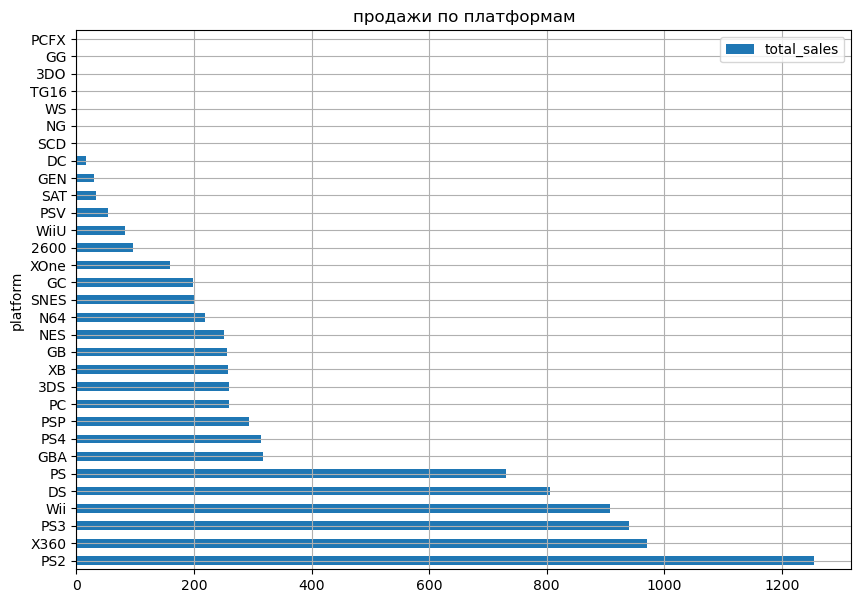

In [10]:
#строим сводную таблицу для продаж по платформам
sales_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
sales_by_platform = sales_by_platform.sort_values(by='total_sales', ascending=False)
#строим столбчатую диаграмму
sales_by_platform.plot(kind='barh',
figsize=(10, 7),
title='продажи по платформам',
grid=True)
plt.show()

Больше всего продаж на платформе `PS2, X360, PS3`. Меньше всего на `PCFX, 3DO, GG`

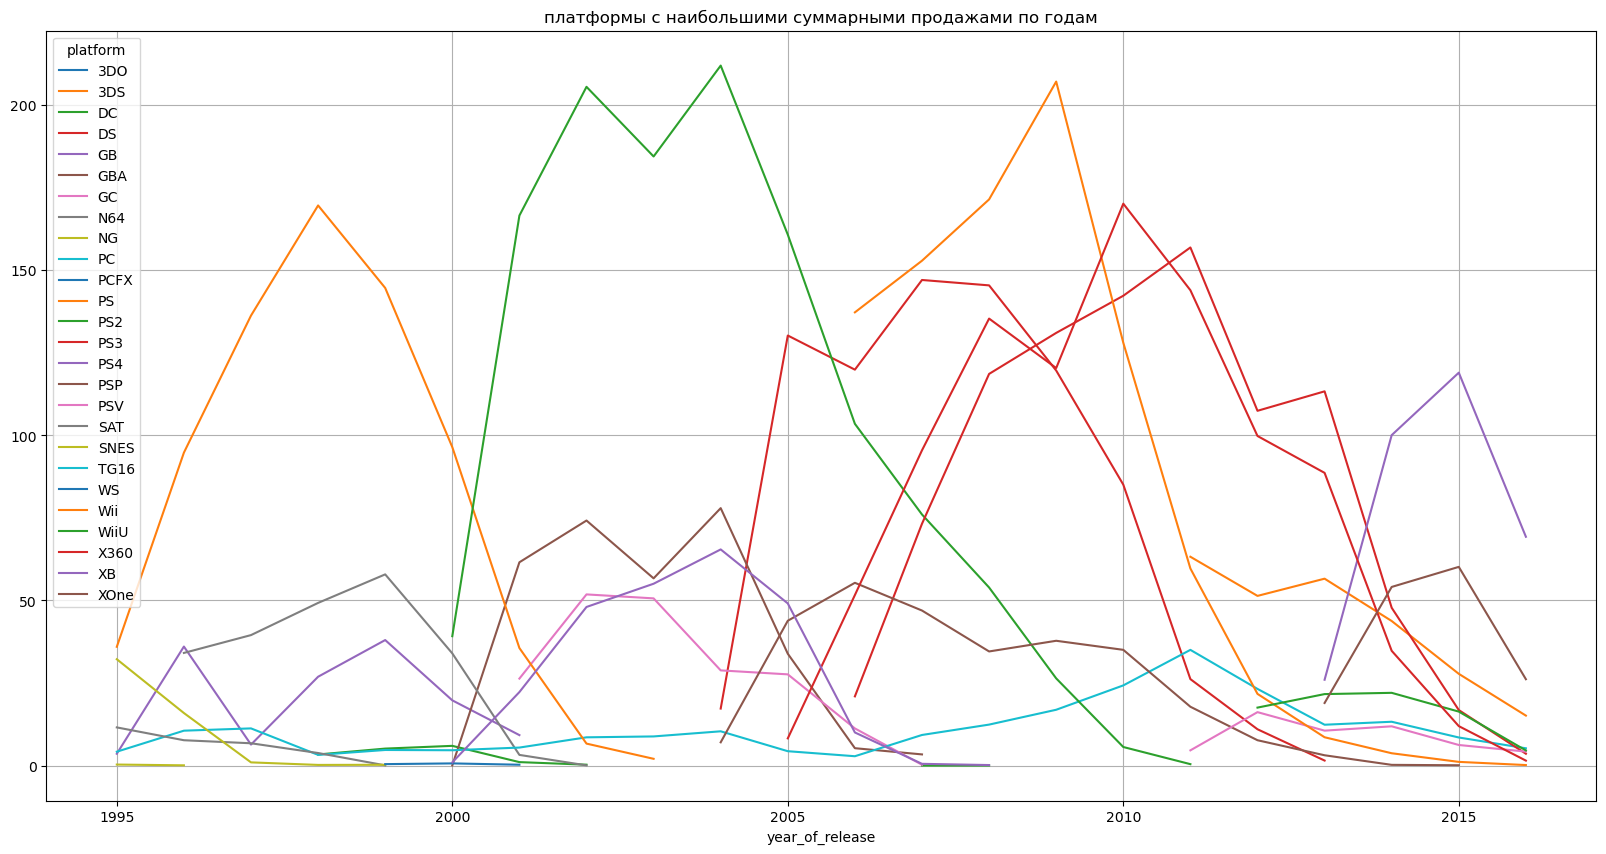

In [11]:
#строим сводную таблицу для платформ с наибольшими суммарными продажами по годам
platform_sales_by_year = data.query('year_of_release > 1994')
platform_sales_by_year = platform_sales_by_year.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
#строим столбчатую диаграмму
platform_sales_by_year.plot(title='платформы с наибольшими суммарными продажами по годам', figsize=(20, 10), grid=True)
plt.show()

In [12]:
#строим сводную таблицу для топ 6 платформ с наибольшими суммарными продажами по годам
top_6_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top_platform_sales_by_year = data[data['platform'].isin(top_6_platform)]

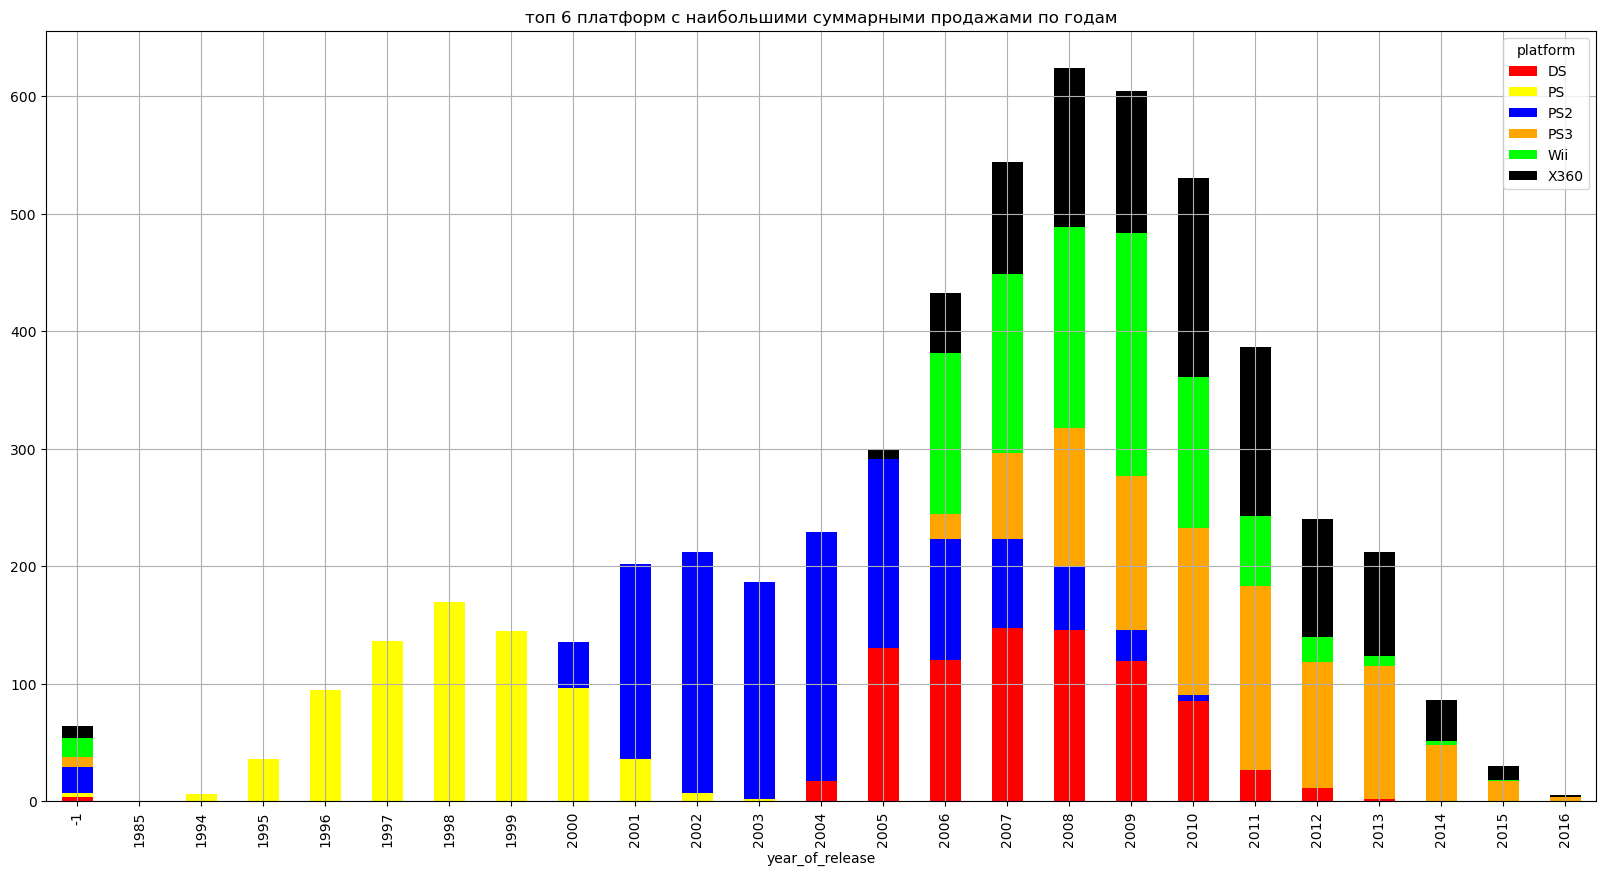

In [13]:
top_platform_sales_by_year = data[data['platform'].isin(top_6_platform)]
top_platform_sales_by_year = top_platform_sales_by_year.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
#строим столбчатую диаграмму
top_platform_sales_by_year.plot.bar(stacked=True, title='топ 6 платформ с наибольшими суммарными продажами по годам', figsize=(20, 10), grid=True, color=["red", "yellow", "blue", "orange", "lime", "black"])
plt.show()

от 5 до 10 лет появляются новые и исчезают старые платформы

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [14]:
#создаем переменную с актуальным периодом
current_period = data.query('year_of_release > 2013')

с 2014 актуальный период, потому что игровая индустрия быстро развивается и быстро меняются тренды

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

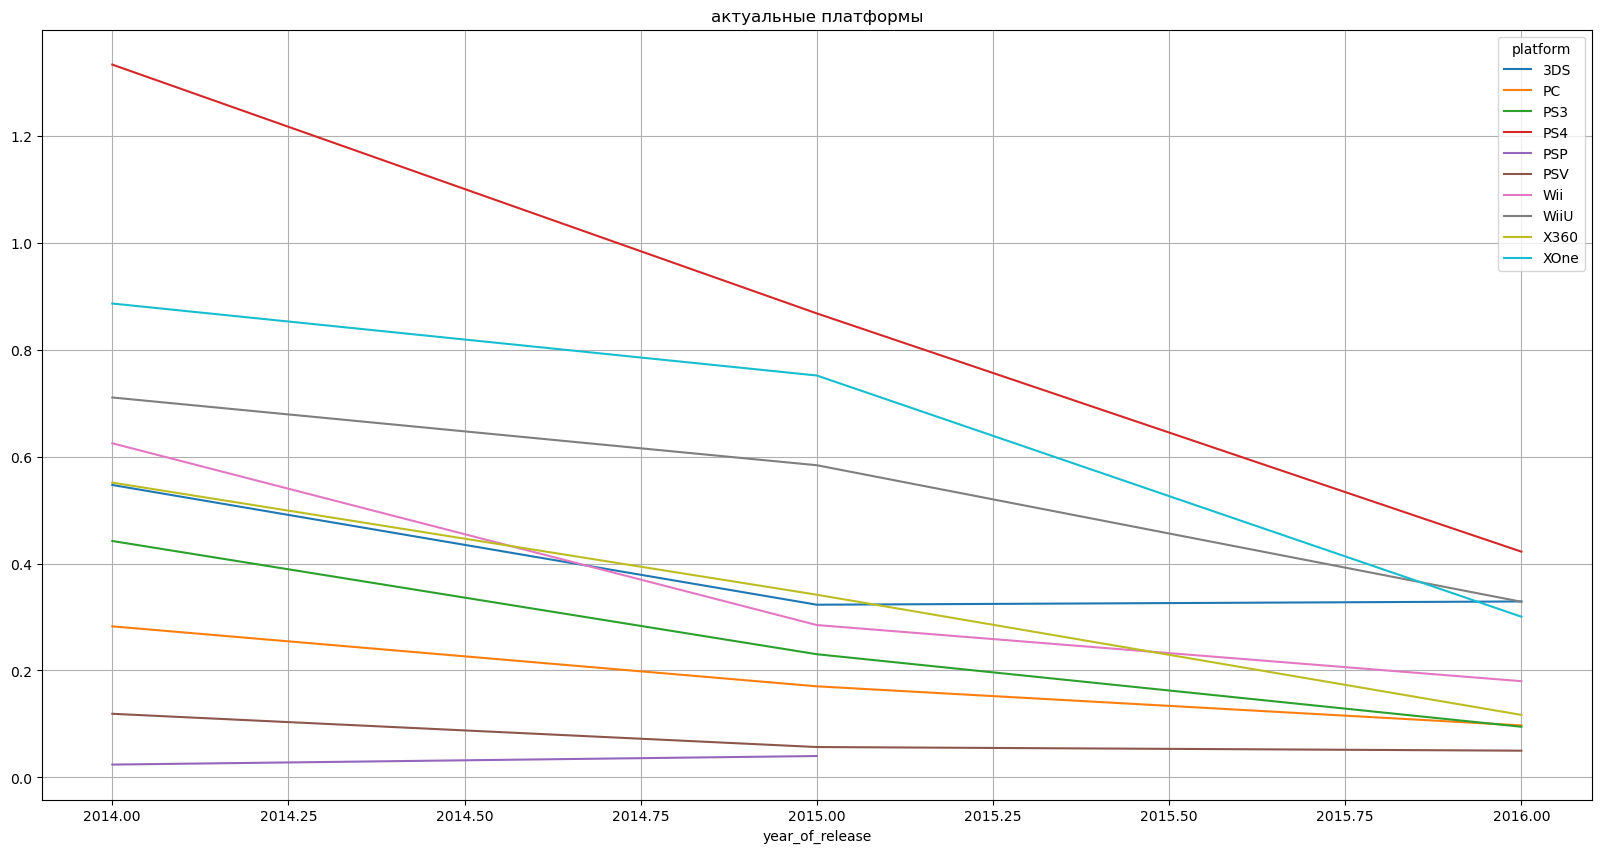

In [15]:
#строим сводную таблицу для актуального периода и столбчатую диаграмму
current_period.pivot_table(index='year_of_release', columns='platform', values='total_sales').plot(title='актуальные платформы', figsize=(20, 10), grid=True)
plt.show()

Лидируют по продажам платформа `PS4`. Падают продажи у всех платформ. Но у платформ `3DS, PSV` до 2015 года было падание, а после пошли стабильные продажи. У платформы `PSP` до 2015 года был рост продаж, а после 2015 года они закончились. Потенциально прибыльные платформы `PS4`, `XOne`, `WiiU`

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

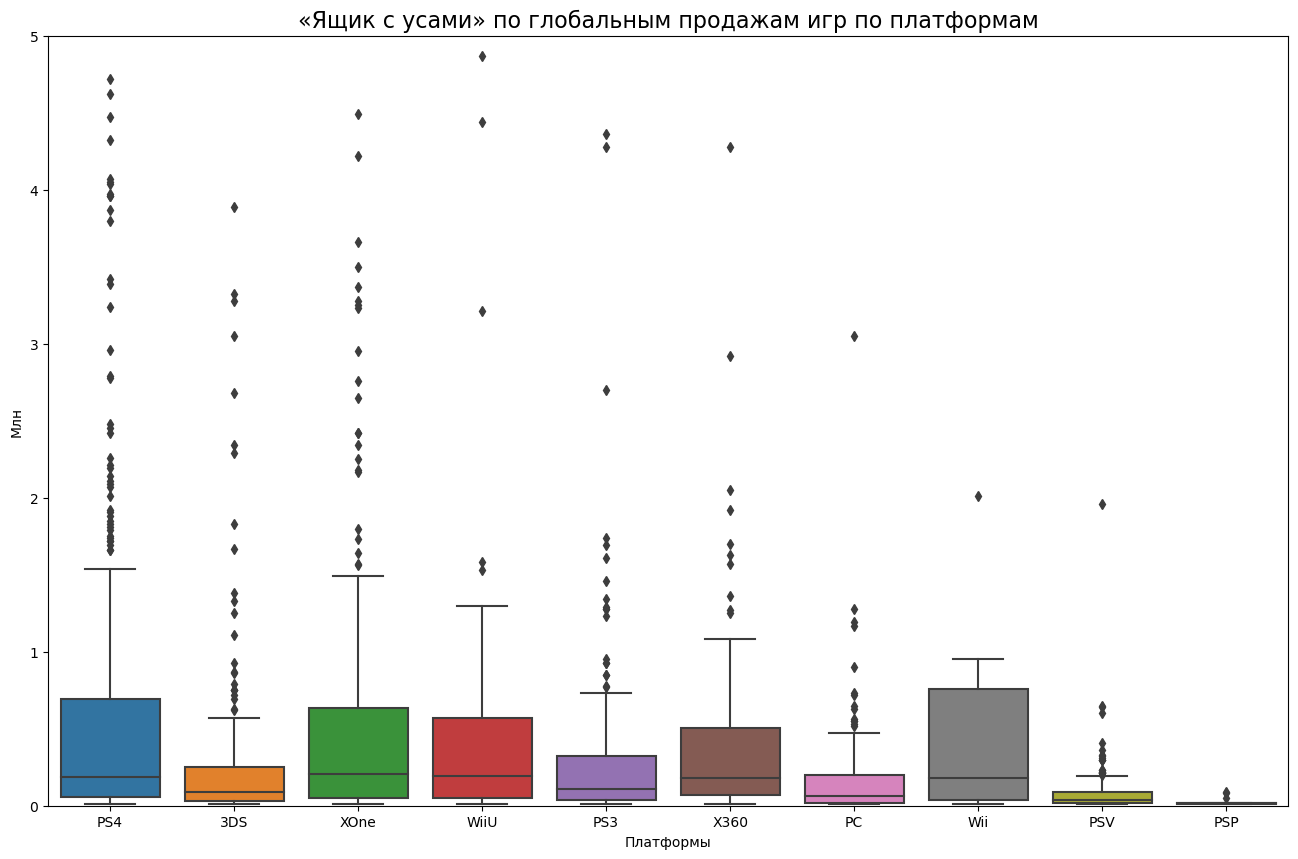

In [16]:
#строим ящик с усами
plt.figure(figsize=(16,10))
sns.boxplot(data=current_period, x='platform', y='total_sales')
plt.title('«Ящик с усами» по глобальным продажам игр по платформам',fontsize=16)
plt.ylim(0, 5) 
plt.xlabel('Платформы')
plt.ylabel('Млн')
plt.show()

Большое количество выбросов у `PS4, 3DS, XOne`. У всех ящик находится до 1 млн продаж, а усы до 2млн, нижний вратиль меньше остальной части на 25% у большинства. Самые большие по продажам это платформы `PS4, XOne`, самые низкие `PSP, PSV`

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

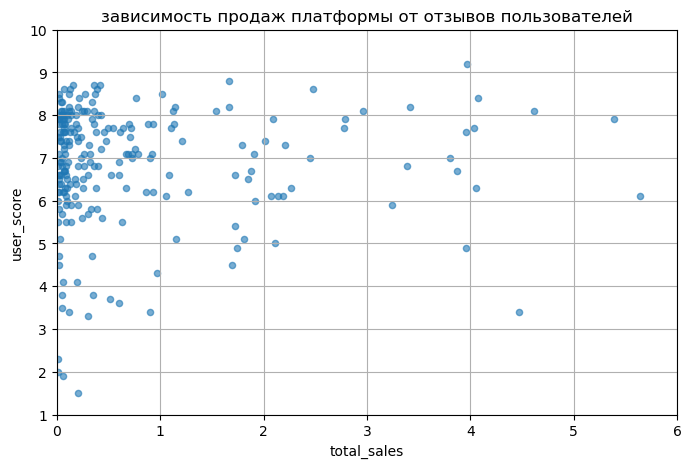

-0.0431858599719363

In [17]:
#строим график зависимости продаж платформы от отзывов пользователей
data_PS4 = current_period.loc[current_period['platform'].isin(['PS4'])] #берем PS4 в качестве платформы
#убираем заглушки
data_PS4 = data_PS4.query('user_score > 0 and critic_score > 0')
data_PS4[['user_score', 'total_sales']].plot(kind='scatter', 
x='total_sales', 
y='user_score', 
title='зависимость продаж платформы от отзывов пользователей',
alpha=0.6, 
grid=True, 
figsize=(8, 5),
legend=True)
plt.xlim(0,6)
plt.ylim(1,10)
plt.show()
#считаем корреляцию Пирсона
data_PS4['total_sales'].corr(data_PS4['user_score'])

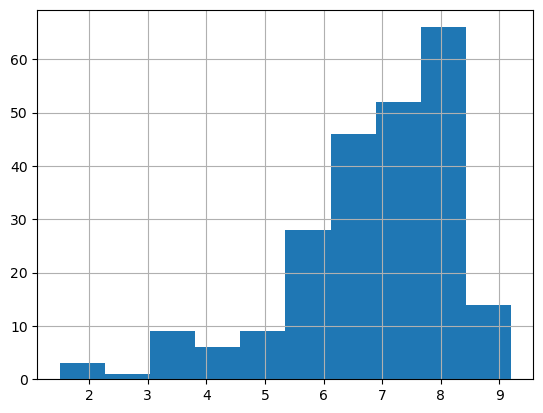

In [18]:
# Код ревьюера
data_PS4['user_score'].hist();

Корреляция близка к нулю, слабая зависимость продаж от отзывов пользователей. В основном пользователи ставят высокую оценку от 6 до 9, очень редко низкую оценку

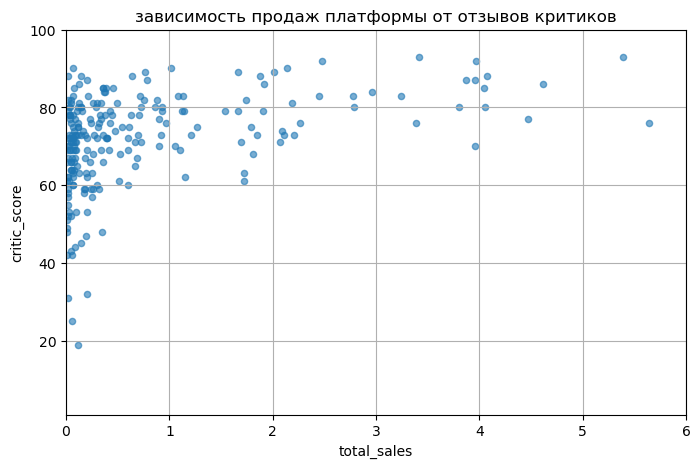

0.4019028781147529

In [19]:
#строим график зависимости продаж платформы от отзывов критиков
data_PS4[['critic_score', 'total_sales']].plot(kind='scatter', 
x='total_sales', 
y='critic_score', 
title='зависимость продаж платформы от отзывов критиков',
alpha=0.6, 
grid=True, 
figsize=(8, 5),
legend=True)
plt.xlim(0,6)
plt.ylim(1,100)
plt.show()
#считаем корреляцию Пирсона
data_PS4['total_sales'].corr(data_PS4['critic_score'])

Корреляция ближе к нулю, слабая зависимость продаж от отзывов критиков. В основном критики ставят высокую оценку от 60 до 90, очень редко ниже 20

`Общий вывод:` хоть корреляция слабая у отзывов пользователей и критиков, но от отзывов критиков больше зависят продажи, чем от отзывов пользователей

#### Соотнесите выводы с продажами игр на других платформах.

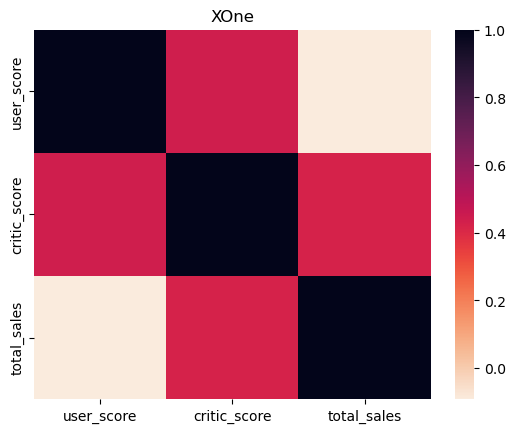

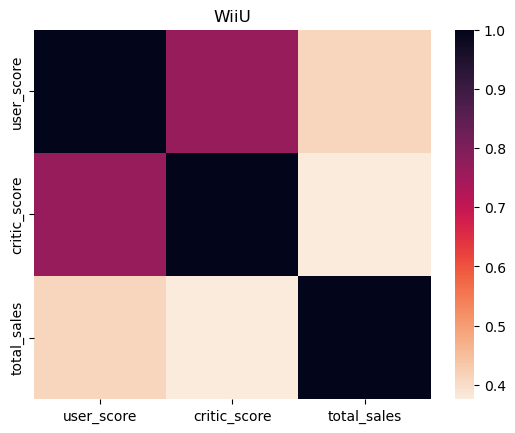

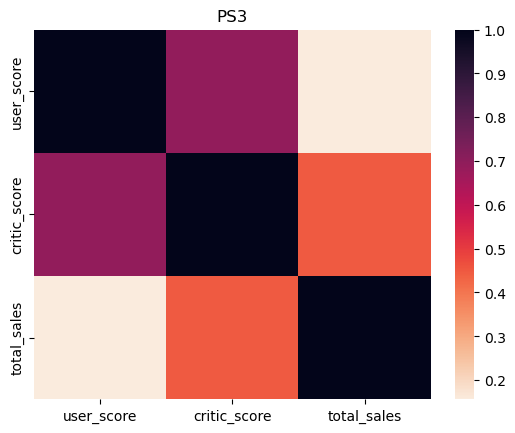

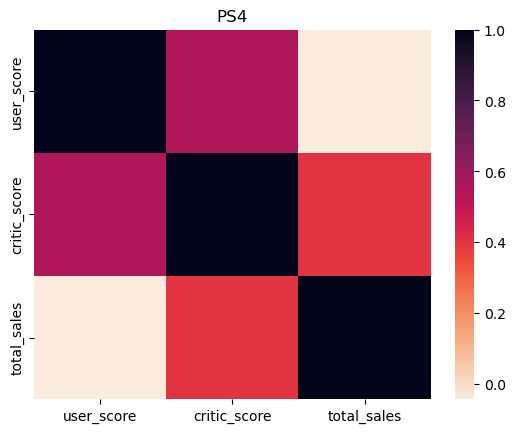

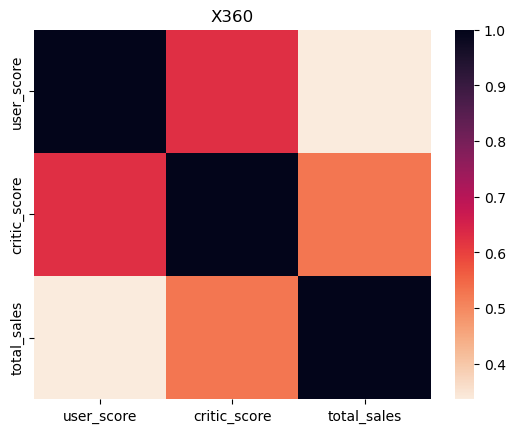

In [20]:
#список платформ
top_platform = ['XOne', 'WiiU', 'PS3', 'PS4', 'X360']
#список столбцов, по которым хотим построить корреляцию
cols = ['user_score', 'critic_score', 'total_sales']
#создаем цикл
for platform in top_platform:
    #создаем переменную без заглушек
    current_period_clean = current_period.query('user_score > 0 and critic_score > 0')
    #отбираем все строки для платформы 
    #и дропаем неинформативные записи среди отобранных
    i = current_period_clean['platform'] == platform
    platform_data = current_period_clean[i].dropna(subset=cols)
    #строим корреляции по выбранным столбцам
    correlations = platform_data[cols].corr()
    ax = sns.heatmap(correlations, cmap='rocket_r')
    ax.set_title(platform)
    plt.show()

Очень слабо у всех платформ кроме `WiiU` продажи зависят от оценки пользователей, у `WiiU` от оценки пользователей продажи зависят чуть сильнее. Больше всего от оценки критиков зависят продажи `XOne, PS4`, средне зависят от оценки критиков продажи `PS3, X360` и слабее всего зависят от оценки критиков продажи `WiiU`

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

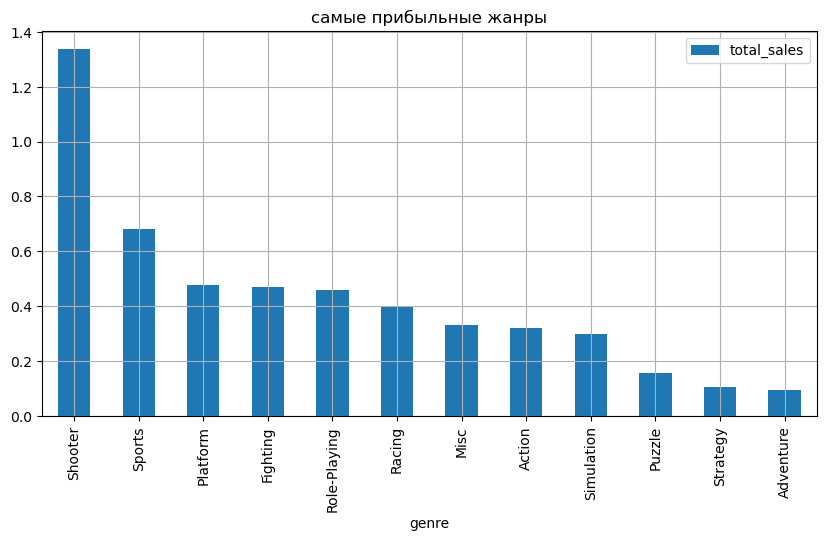

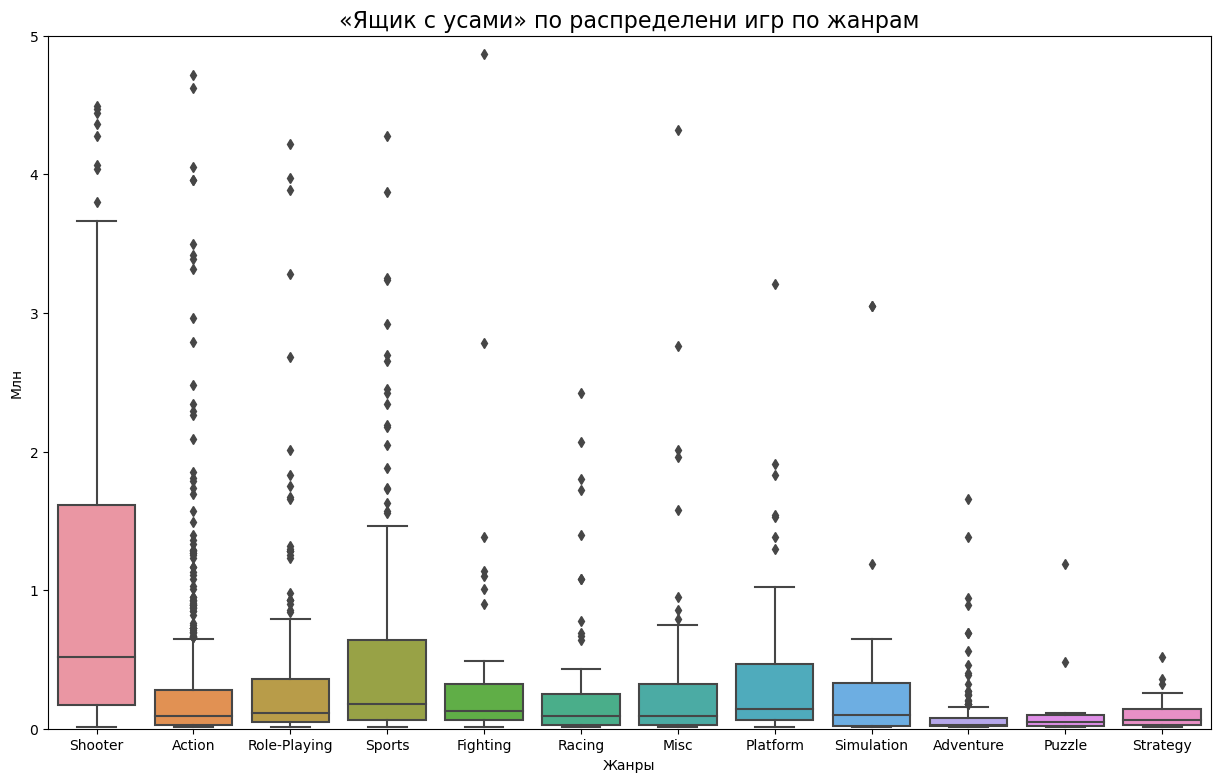

In [21]:
#строим сводную таблицу для самых прибыльных жанров
profitable_genres = current_period.pivot_table(index='genre', values='total_sales')
profitable_genres = profitable_genres.sort_values(by='total_sales', ascending=False)
#строим столбчатую диаграмму
profitable_genres.plot(kind='bar',
figsize=(10, 5),
title='самые прибыльные жанры',
grid=True) 
plt.show()
#строим ящик с усами
plt.figure(figsize=(15,9))
sns.boxplot(data=current_period, x='genre', y='total_sales')
plt.title('«Ящик с усами» по распределени игр по жанрам',fontsize=16)
plt.ylim(0, 5) 
plt.xlabel('Жанры')
plt.ylabel('Млн')
plt.show()

Самый прибыльный жанр это шутеры, он оторвался от всех соперников, затем идут платформеры и спорт. Самые неприбыльные это приключение, пазлы и стратегия.

### Составьте портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP):

##### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Text(0.5, 0.98, 'топ 5 популярных платформ регион NA')

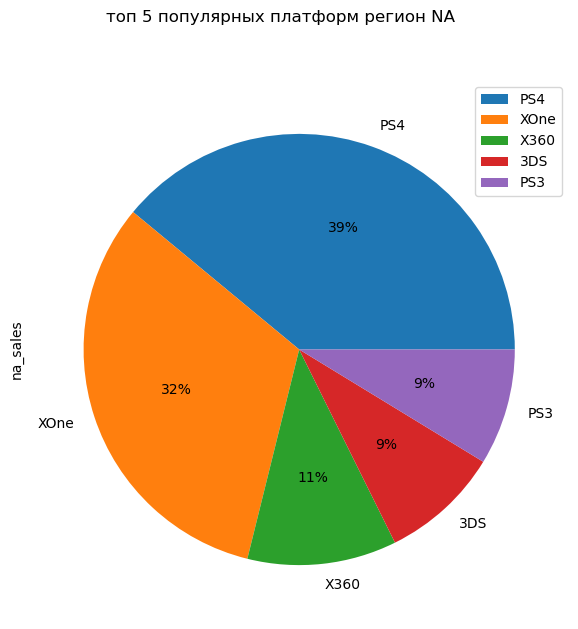

In [22]:
#создаем сводную таблицу для региона NA
top_5_platform_na = current_period.pivot_table(index='platform', values='na_sales', aggfunc='sum')
top_5_platform_na = top_5_platform_na.sort_values(by='na_sales', ascending=False).head(5)
#строим круговой график
top_5_platform_na.plot.pie(subplots=True, figsize=(15,7), autopct='%.0f%%')
plt.suptitle('топ 5 популярных платформ регион NA')

топ 5 платформ в регионе Северная Америка:
- `PS4`
- `XOne`
- `X360`
- `3DS`
- `PS3`

Text(0.5, 0.98, 'топ 5 популярных платформ регион EU')

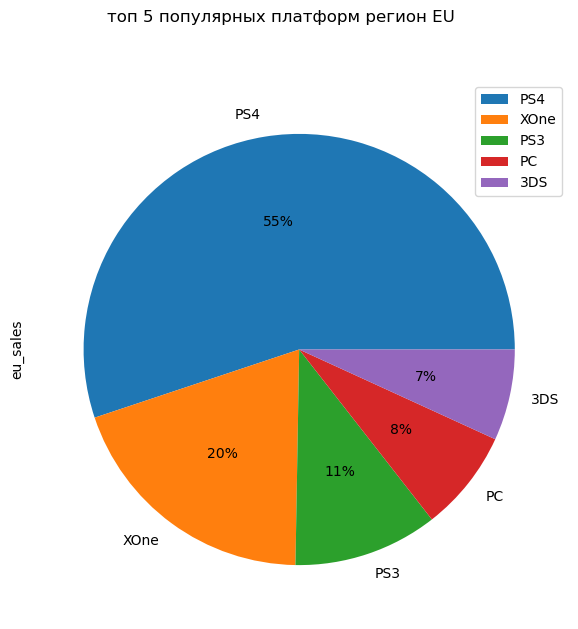

In [23]:
#создаем сводную таблицу для региона EU
top_5_platform_eu = current_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
top_5_platform_eu = top_5_platform_eu.sort_values(by='eu_sales', ascending=False).head(5)
#строим круговой график
top_5_platform_eu.plot.pie(subplots=True, figsize=(15,7), autopct='%.0f%%')
plt.suptitle('топ 5 популярных платформ регион EU')

топ 5 платформ в регионе Европа:
- `PS4`
- `XOne`
- `PS3`
- `PC`
- `3DS`


Text(0.5, 0.98, 'топ 5 популярных платформ регион JP')

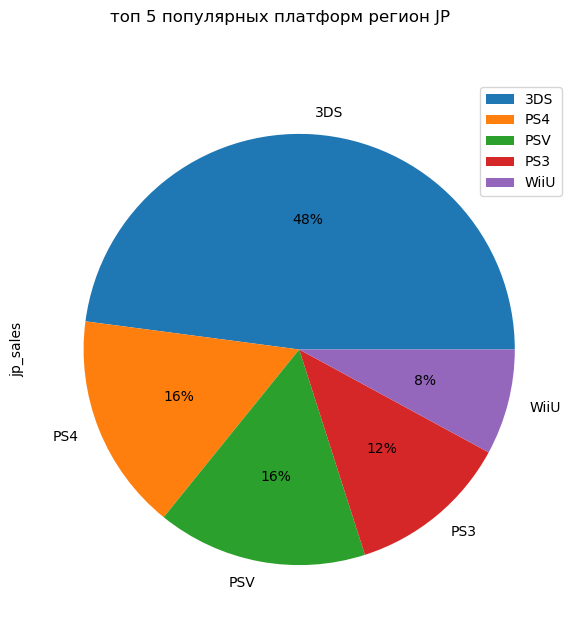

In [24]:
#создаем сводную таблицу для региона JP
top_5_platform_jp = current_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
top_5_platform_jp = top_5_platform_jp.sort_values(by='jp_sales', ascending=False).head(5)
#строим круговой график
top_5_platform_jp.plot.pie(subplots=True, figsize=(15,7), autopct='%.0f%%')
plt.suptitle('топ 5 популярных платформ регион JP')

топ 5 платформ в регионе Япония:
- `3DS`
- `PS4`
- `PSV`
- `PS3`
- `WiiU`


`Общий вывод:` во всех регионах в топ 5 входит платформы `PS4, 3DS, PS3`. В регионе Северная Америка 4 платформы это стационарные приставки и 1 переносная приставка. В Европейском регионе 3 платформы это стационарные приставки, 1 персональный компьютер и 1 переносная приставка. В Японском регионе весь топ 5 занимают платформы японского производства, часть стационарные приставки, а другая часть переносные приставки, которые можно взять с собой в дорогу.

##### Самые популярные жанры (топ-5). Поясните разницу.

Text(0.5, 0.98, 'топ 5 популярных жанров в регионе NA')

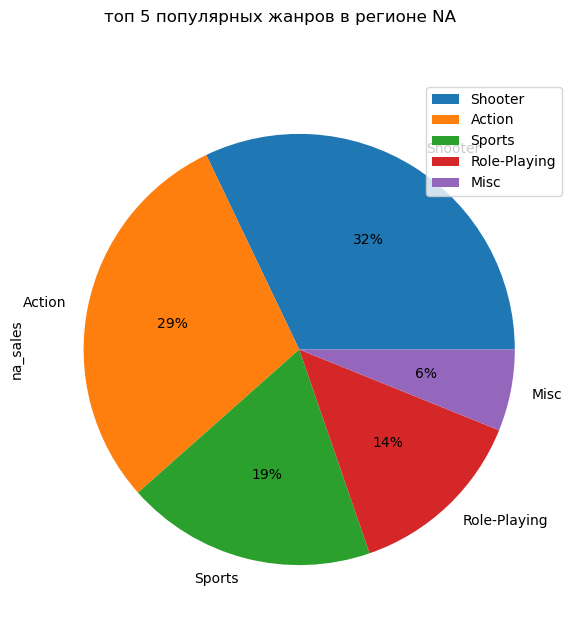

In [25]:
#создаем сводную таблицу для региона NA
top_5_genre_na = current_period.pivot_table(index='genre', values='na_sales', aggfunc='sum')
top_5_genre_na = top_5_genre_na.sort_values(by='na_sales', ascending=False).head(5)
#строим круговой график
top_5_genre_na.plot.pie(subplots=True, figsize=(15,7), autopct='%.0f%%')
plt.suptitle('топ 5 популярных жанров в регионе NA')

топ 5 платформ в регионе Северная Америка:
- `Shooter`
- `Action`
- `Sports`
- `Role`
- `Misc`

Text(0.5, 0.98, 'топ 5 популярных жанров в регионе EU')

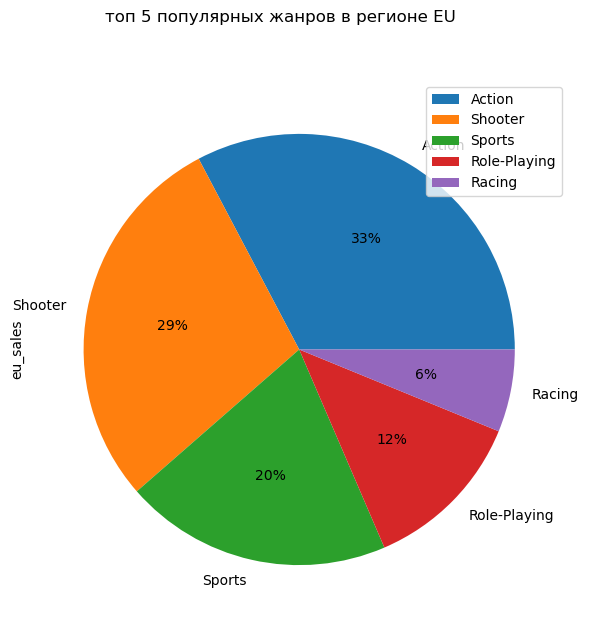

In [26]:
#создаем сводную таблицу для региона EU
top_5_genre_eu = current_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
top_5_genre_eu = top_5_genre_eu.sort_values(by='eu_sales', ascending=False).head(5)
#строим круговой график
top_5_genre_eu.plot.pie(subplots=True, figsize=(15,7), autopct='%.0f%%')
plt.suptitle('топ 5 популярных жанров в регионе EU')

топ 5 платформ в регионе Европа:
- `Action`
- `Shooter`
- `Sports`
- `Role-Playing`
- `Racing`


Text(0.5, 0.98, 'топ 5 популярных жанров в регионе JP')

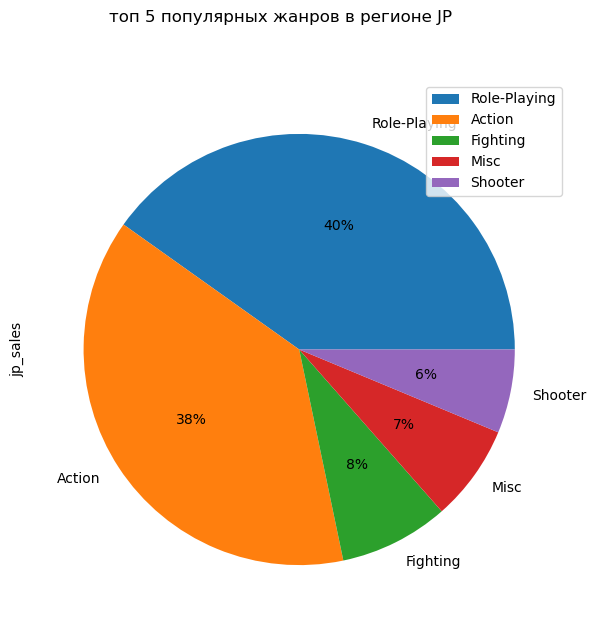

In [27]:
#создаем сводную таблицу для региона JP
top_5_genre_jp = current_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
top_5_genre_jp = top_5_genre_jp.sort_values(by='jp_sales', ascending=False).head(5)
#строим круговой график
top_5_genre_jp.plot.pie(subplots=True, figsize=(15,7), autopct='%.0f%%')
plt.suptitle('топ 5 популярных жанров в регионе JP')

топ 5 платформ в регионе Япония:
- `Role-Playing`
- `Action`
- `Fighting`
- `Misc`
- `Shooter`

`общий вывод:` во всех регионах в топ 5 входят жанры `Shooter, Action`. В регионе Северная Америка люди любят играть в шутеры, экшены, спортивные, ролевые, разные жанры. В Европейском регионе похожи вкусы с регионом NA, там любят играть в экшены, шутеры, спортивные, ролевые, гоночные жанры. В Японском регионе любят играть в ролевые, экшены, файтинг, разные, шутеры жанры.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [28]:
#переименовываем названия рейтинга
current_period['rating'] = current_period['rating'].replace({
    'EC': 'для детей младшего возраста',
    'E': 'для всех возрастов',
    'E10+': 'для лиц старше 10 лет',
    'T': 'для лиц старше 13 лет',
    'M': 'для лиц старше 17 лет',
    'AO': 'для взрослых старше 18 лет',
    'RP': 'категория ещё не присвоена',
    'K-A': 'для детей и взрослых'
}
)
#заполняем пропуски в столбце rating
current_period['rating'] = current_period['rating'].fillna('unknown')
#создаем сводную таблицу по всем регионам
rating_region = current_period.loc[:, ['rating', 'na_sales', 'eu_sales', 'jp_sales']].groupby('rating').sum()
rating_region.sort_values(by='na_sales', ascending=False)

,na_sales,eu_sales,jp_sales
rating,,,
для лиц старше 17 лет,96.42,93.44,8.01
unknown,64.72,58.95,56.90
для всех возрастов,50.74,58.06,8.94
для лиц старше 13 лет,38.95,34.07,14.78
для лиц старше 10 лет,33.23,26.16,4.46


Text(0.5, 0.98, 'распределение продаж игр по рейтингу ESBR в регионе NA')

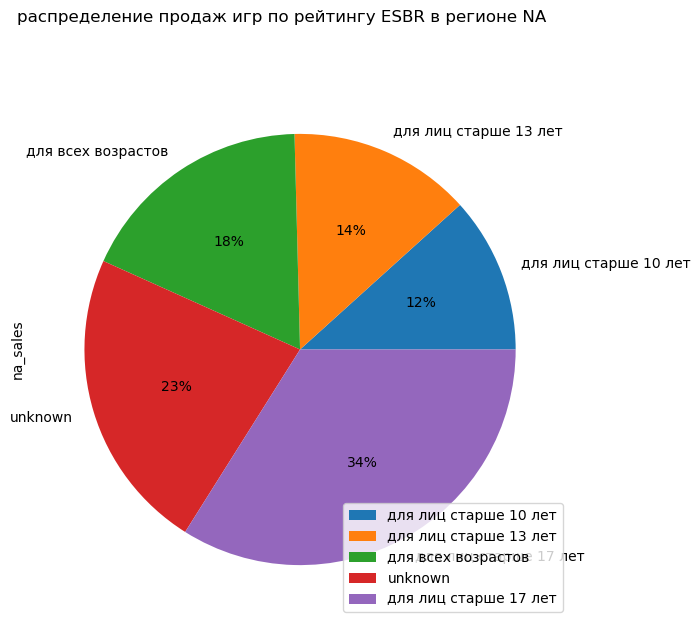

In [29]:
#создаем сводную таблицу для региона NA
rating_na = current_period.pivot_table(index='rating', values='na_sales', aggfunc='sum')
rating_na = rating_na.sort_values(by='na_sales', ascending=True)
#строим круговой график
rating_na.plot.pie(subplots=True, figsize=(15,7), autopct='%.0f%%')
plt.suptitle('распределение продаж игр по рейтингу ESBR в регионе NA')

Text(0.5, 0.98, 'распределение продаж игр по рейтингу ESBR в регионе EU')

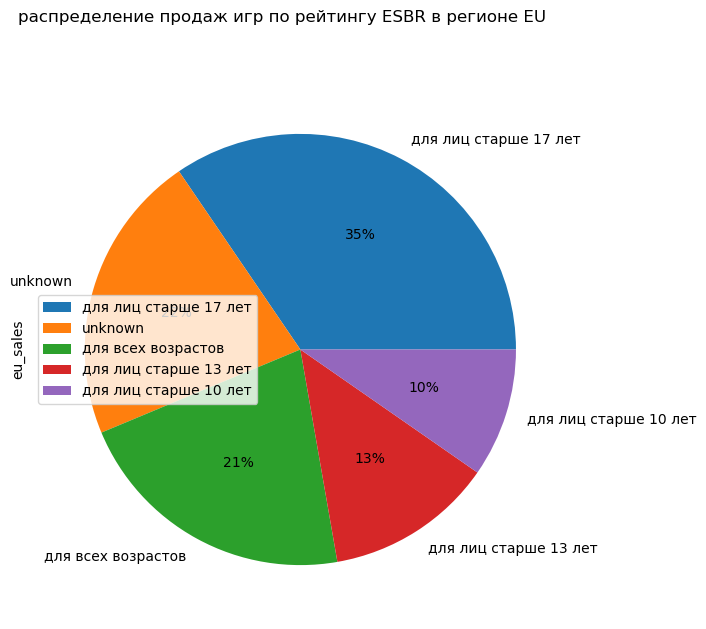

In [30]:
#создаем сводную таблицу для региона EU
rating_eu = current_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
rating_eu = rating_eu.sort_values(by='eu_sales', ascending=False)
#строим круговой график
rating_eu.plot.pie(subplots=True, figsize=(15,7), autopct='%.0f%%')
plt.suptitle('распределение продаж игр по рейтингу ESBR в регионе EU')

Text(0.5, 0.98, 'распределение продаж игр по рейтингу ESBR в регионе JP')

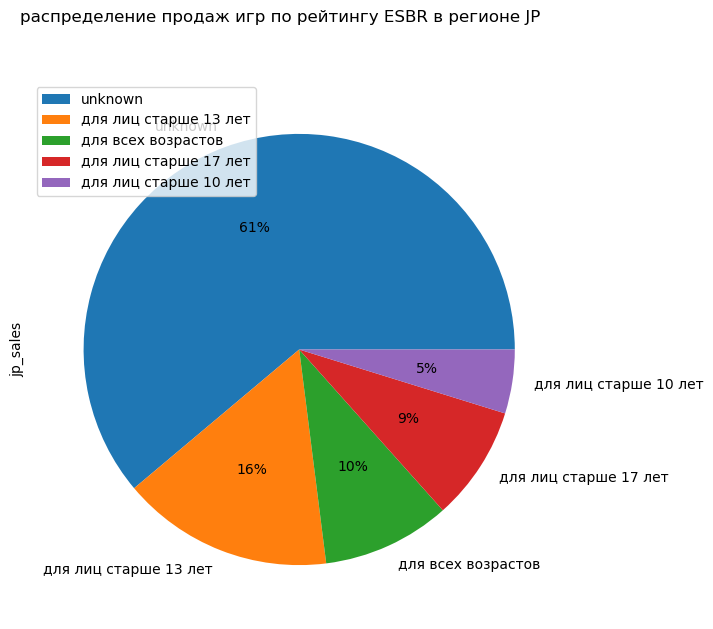

In [31]:
#создаем сводную таблицу для региона JP
rating_jp = current_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
rating_jp = rating_jp.sort_values(by='jp_sales', ascending=False)
#строим круговой график
rating_jp.plot.pie(subplots=True, figsize=(15,7), autopct='%.0f%%')
plt.suptitle('распределение продаж игр по рейтингу ESBR в регионе JP')

Во всех регионах в топ входят игры с одинаковым рейтингом ESBR, описывающих универсального покупателя - взрослые и подростки. В регионе Северная Америка больше всего продаж игр `для лиц старше 17 лет`, затем игры с неопределенным рейтингом. В регионе Европа, так же как в NA больше всего продаж игр `для лиц старше 17 лет` и игр с неопределенным рейтингом. В регионе Япония больше половины продаж игры с неопределенным рейтингом, а игры `для лиц старше 17 лет` занимают малое количество, это может быть связанно с тем что в Японии свой рейтинг определения игр

### Проверьте гипотезы.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

```
H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = средний пользовательский рейтинг (user_score)   платформы PC
H_1: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ средний пользовательский рейтинг (user_score)   платформы PC
alpha = 0.05
```

In [32]:
#проверяем гипотезу
#создаем переменную без заглушек
current_period_clean = current_period.query('user_score > 0')
user_score_xone = current_period_clean[current_period_clean['platform'] == 'XOne']['user_score']
user_score_pc = current_period_clean[current_period_clean['platform'] == 'PC']['user_score']
results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


не получилось отвергнуть нулевую гипотизу, значит средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Средний пользовательский рейтинг (user_score) жанра Action = средний пользовательский рейтинг (user_score) жанра   Sports
H_1: Средний пользовательский рейтинг (user_score) жанра Action ≠ средний пользовательский рейтинг (user_score) жанра   Sports
alpha = 0.05
```

In [33]:
#проверяем гипотезу
user_score_action = current_period_clean[current_period_clean['genre'] == 'Action']['user_score']
user_score_sports = current_period_clean[current_period_clean['genre'] == 'Sports']['user_score']
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825550382644557e-14
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, значит средние пользовательские рейтинги жанров `Action` и `Sports` разные

#### Как вы сформулировали нулевую и альтернативную гипотезы.

Для платформ Xbox One и PC:
- H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = средний пользовательский рейтинг (user_score) платформы PC
- H_1: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ средний пользовательский рейтинг (user_score) платформы PC

Для жанров Action и Sports:
- H_0: Средний пользовательский рейтинг (user_score) жанра Action ≠ средний пользовательский рейтинг (user_score) жанра Sports
- H_1: Средний пользовательский рейтинг (user_score) жанра Action = средний пользовательский рейтинг (user_score) жанра Sports

#### Какой критерий применили для проверки гипотез и почему.

выбрал критерий 0.05, потому что это стандартный критерий для проверик большинства гипотез

### Общий вывод

 `Подготовил данные:`
- Заменил названия столбцов
- Преобразовал данные в нужный тип и описал почему заменил тип данных
- Обработал пропуски
- Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец
 
 `Провел исследовательский анализ данных:`
- Посмотрел сколько игр выпускалось в разные годы
- Посмотрел, как менялись продажи по платформам
- Выбрал платформы с наибольшими суммарными продажами и построил распределение по годам
- Взял данные за соответствующий актуальный период
- Не учитывал в работе данные за предыдущие годы
- Выберал несколько потенциально прибыльных платформ
- Построил график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- Посмотрел, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
- Построил диаграмму рассеяния и посчитал корреляцию между отзывами и продажами
- Соотнес выводы с продажами игр на других платформах
- Посмотрел на общее распределение игр по жанрам

 `Составил портрет пользователя каждого региона:`
 Определил для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Выяснил влияет ли рейтинг ESRB на продажи в отдельном регионе

 `Проверил гипотезы:`
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные


На основе полученных данных можно сделать вывод, что количество игр выпускавшихся до 1994 года мало и данные об этих играх не так важны. Больше всего продаж на платформах `PS2, X360, PS3`, а меньше всего на `PCFX, 3DO, GG`. От 5 до 10 лет появляются новые и исчезают старые платформы. Актуальным периодом можно считать данные с 2014 года, потому что игровая индустрия быстро развивается и быстро меняются тренды. Лидируют по продажам `PS4`, падают продажи у всех платформ. Потенциально прибыльные платформы `PS4, XOne, WiiU`. По «ящику с усами» по глобальным продажам игр в разбивке по платформам видно большое количество выбросов у `PS4, XOne`, у всех ящик находится до 1 млн продаж, а усы до 2млн, нижний вратиль меньше остальной части на 25% у большинства, самые большие по продажам это платформы `PS4, XOne`, самые низкие `PSP, PSV `. Посмотрел, как влияют на продажи `PS4` отзывы пользователей и критиков, как оказалось от отзывов критиков больше зависят продажи. Соотнес выводы с продажами игр на других платформах, оказалось очень слабо у всех платформ продажи зависят от оценки пользователей, больше всего зависят продажи `XOne, PS4`, средне зависят продажи `PS3, X360` и слабее всего зависят продажи `WiiU`. Самый прибыльный жанр это шутеры, он оторвался от всех соперников, затем идут платформеры и спорт, самые неприбыльные это приключение, пазлы и стратегия. Во всех регионах в топ 5 входит платформы `PS4, 3DS, PS3`, большинство платформ это стационарные приставки и часть переносные. Во всех регионах в топ 5 входят жанры `Shooter, Action`, в большинстве все любят играть в активные игры. Продажи игр с рейтингом ESBR в Северной Америке и Европе одинаковые там лидируют `для лиц старше 17 лет` и с неопределенным рейтингом, а в Японии больше половины занимают игры с неопределенным рейтингом. Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые. Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Магазину нужно концетрировать внимание на платформах `PS4, XOne, WiiU`, жанрах `Shooter, Action`, рейтинге `для всех возрастов` и делать ставку на регион `NA`, потому что там продаж игр больше чем в двух регионах `EU и JP` вместе взятых.